## NewsGroup20

In [ ]:
import numpy as np
import math
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

x, y  = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), return_X_y=True, random_state=42)

#VECTORIZATION
#COUNT
vectorizer_count = CountVectorizer(stop_words='english', strip_accents='ascii')
count_newsgroup_x = vectorizer_count.fit_transform(x)
words_as_features_count = vectorizer_count.get_feature_names_out()

#TFID
#vectorize to make each word a feature
vectorizer_tfid = TfidfVectorizer(stop_words='english', strip_accents='ascii')
tfid_newsgroup_x = vectorizer_tfid.fit_transform(x)
words_as_features_tfid = vectorizer_tfid.get_feature_names_out()

#TEST TRAIN SPLIT
TRAIN_PERCENTAGE = 80 
#Count Data
num_instances_count = count_newsgroup_x.shape[0]
splitIndex = math.floor(num_instances_count*(TRAIN_PERCENTAGE/100))
count_newsgroup_x_train, count_newsgroup_x_test = count_newsgroup_x[:splitIndex], count_newsgroup_x[splitIndex:]
count_newsgroup_y_train, count_newsgroup_y_test = y[:splitIndex], y[splitIndex:]

#Tfid Data
num_instances_tfid = tfid_newsgroup_x.shape[0]
splitIndex = math.floor(num_instances_tfid*(TRAIN_PERCENTAGE/100))
tfid_newsgroup_x_train, tfid_newsgroup_x_test = tfid_newsgroup_x[:splitIndex], tfid_newsgroup_x[splitIndex:]
tfid_newsgroup_y_train, tfid_newsgroup_y_test = y[:splitIndex], y[splitIndex:]

(11314, 101320)
(11314, 101320)


# Sentiment 140 Dataset


In [ ]:
import numpy as np
from google.colab import files
import scipy
from scipy import sparse

#uncomment for prompt to uploadfile
#uploaded = files.upload()

#COUNT VECTORIZED
count_sentiment_x_train = scipy.sparse.load_npz(file = '/content/count_sentiment_x_train.npz')
count_sentiment_y_train = np.load(file = '/content/count_sentiment_y_train.npy')
count_sentiment_x_test = scipy.sparse.load_npz(file = '/content/count_sentiment_x_test.npz')
count_sentiment_y_test = np.load(file = '/content/count_sentiment_y_test.npy')
count_sentiment = (count_sentiment_x_train,  count_sentiment_y_train, count_sentiment_x_test, count_sentiment_y_test)

#TFID
tfid_sentiment_x_train = scipy.sparse.load_npz(file = '/content/tfid_sentiment_x_train.npz')
tfid_sentiment_y_train = np.load(file = '/content/tfid_sentiment_y_train.npy')
tfid_sentiment_x_test = scipy.sparse.load_npz(file = '/content/tfid_sentiment_x_test.npz')
tfid_sentiment_y_test = np.load(file = '/content/tfid_sentiment_y_test.npy')
tfid_sentiment = (tfid_sentiment_x_train, tfid_sentiment_y_train, tfid_sentiment_x_test, tfid_sentiment_y_test)

(100000, 93761)
(100000,)
(358, 93761)
(358,)
(100000, 93761)
(100000,)
(358, 93761)
(358,)


In [ ]:
import numpy as np
from numpy import genfromtxt
import math
from google.colab import files
import pandas as pd
import itertools
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from io import StringIO
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
import requests
from io import StringIO
import random
import sys
import csv
from random import shuffle

#load the csv into a pandas dataframe, attributes are not labelled columns (target is the class or label), shuffle
#train
sentiment_onefourty_train = pd.read_csv('sentiment_train.csv', header= 0, delimiter=",", nrows=100000,encoding_errors='ignore', usecols=[0,5],skiprows=([i for i in range(0, 750000)] + [j for j in range(950000, 1600000)]))
sentiment_onefourty_train.columns=['target', 'text']
print(sentiment_onefourty_train['target'].value_counts())
#test
sentiment_onefourty_test = pd.read_csv('sentiment_test.csv', header= 0, delimiter=",", nrows=30000, encoding_errors='ignore', usecols=[0,5])
sentiment_onefourty_test.columns=['target', 'text']
print(sentiment_onefourty_test['target'].value_counts())

#shuffle
sentiment_onefourty_train = sentiment_onefourty_train.sample(frac=1, random_state = 1234)
sentiment_onefourty_test = sentiment_onefourty_test.sample(frac=1, random_state = 1234)

#extract the target (class values) to numpy array and convert to 0's and 1's (instead of 0,4)
#train
sentiment_onefourty_y_train = sentiment_onefourty_train['target'].to_numpy(copy=True)
sentiment_onefourty_y_train = np.where(sentiment_onefourty_y_train > 0, 1, sentiment_onefourty_y_train)
#test
sentiment_onefourty_y_test = sentiment_onefourty_test['target'].to_numpy(copy=True)
sentiment_onefourty_y_test = np.where(sentiment_onefourty_y_test > 0, 1, sentiment_onefourty_y_test)
#same things but keep naming convetion to avoid confusion
tfid_sentiment_y_train = sentiment_onefourty_y_train
count_sentiment_y_train = sentiment_onefourty_y_train
tfid_sentiment_y_test = sentiment_onefourty_y_test
count_sentiment_y_test = sentiment_onefourty_y_test

#CREATE COUNT AND TFID VECTORIZED DATA SETS

#extract the text arrays from the pandas dataframe 'text' column (for both test and train)
sentiment_onefourty_text_train= sentiment_onefourty_train['text'].to_numpy(copy=True)
sentiment_onefourty_text_test= sentiment_onefourty_test['text'].to_numpy(copy=True)

#Count Vectorizer
#train set
vectorizer_count_train = CountVectorizer(stop_words='english', strip_accents='ascii') 
count_sentiment_x_train = vectorizer_count_train.fit_transform(sentiment_onefourty_text_train)
words_as_features_count_train = vectorizer_count_train.get_feature_names_out()

#test set
vectorizer_count_test = CountVectorizer(vocabulary =words_as_features_count_train)
count_sentiment_x_test = vectorizer_count_test.fit_transform(sentiment_onefourty_text_test)
words_as_features_count_test = vectorizer_count_test.get_feature_names_out()

#Tfid vectorizer
vectorizer_tfid_train = TfidfVectorizer(stop_words='english', strip_accents='ascii')
tfid_sentiment_x_train = vectorizer_tfid_train.fit_transform(sentiment_onefourty_text_train)
words_as_features_tfid_train = vectorizer_tfid_train.get_feature_names_out()

vectorizer_tfid_test = TfidfVectorizer(vocabulary = words_as_features_tfid_train)
tfid_sentiment_x_test = vectorizer_tfid_test.fit_transform(sentiment_onefourty_text_test)
words_as_features_tfid_test = vectorizer_tfid_test.get_feature_names_out()

#Save files
#count vectorized
scipy.sparse.save_npz("count_sentiment_x_train.npz", count_sentiment_x_train, compressed=True)
scipy.sparse.save_npz("count_sentiment_x_test.npz", count_sentiment_x_test, compressed=True)
np.save("count_sentiment_y_train.npy", count_sentiment_y_train, allow_pickle=False)
np.save("count_sentiment_y_test.npy", count_sentiment_y_test, allow_pickle=False)

#tfid vectorized
scipy.sparse.save_npz("tfid_sentiment_x_train.npz", tfid_sentiment_x_train, compressed=True)
scipy.sparse.save_npz("tfid_sentiment_x_test.npz", tfid_sentiment_x_test, compressed=True)
np.save("tfid_sentiment_y_train.npy", tfid_sentiment_y_train, allow_pickle=False)
np.save(f"tfid_sentiment_y_test.npy", tfid_sentiment_y_test, allow_pickle=False)

4    50001
0    49999
Name: target, dtype: int64
4    181
0    177
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"


# Logistic (Softmax) Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(tfid_newsgroup_x_train, tfid_newsgroup_y_train)

LogisticRegression()

In [ ]:
#the dataset is too large (does not converge) so the lower bound of maximum iteration is 1000 to have results
logisticRegr2 = LogisticRegression(max_iter=1000)
logisticRegr2.fit(count_newsgroup_x_train, count_newsgroup_y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logisticRegr3 = LogisticRegression(C = 0.874,penalty='elasticnet',solver='saga',l1_ratio=0.026)
logisticRegr3.fit(tfid_sentiment_x_train, tfid_sentiment_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


LogisticRegression(C=0.874, l1_ratio=0.026)

In [ ]:
logisticRegr4 = LogisticRegression(C = 0.69, penalty='elasticnet', max_iter = 1000, n_jobs=-1, l1_ratio=0.7)
logisticRegr4.fit(count_sentiment_x_train, count_sentiment_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.69, l1_ratio=0.7)

In [ ]:
twentygroup_predictions = logisticRegr.predict(tfid_newsgroup_x_test)
twentygroup_predictions2 = logisticRegr2.predict(count_newsgroup_x_test)
sentiment_predictions = logisticRegr3.predict(tfid_sentiment_x_test)
sentiment_predictions2 = logisticRegr4.predict(count_sentiment_x_test)

Measuring Model Performance

In [ ]:
twentygroup_score=logisticRegr.score(tfid_newsgroup_x_test, tfid_newsgroup_y_test)
twentygroup_score2=logisticRegr2.score(count_newsgroup_x_test, count_newsgroup_y_test)
sentiment_score=logisticRegr3.score(tfid_sentiment_x_test, tfid_sentiment_y_test)
sentiment_score2=logisticRegr4.score(count_sentiment_x_test, count_sentiment_y_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import metrics

print('Accuracy Score for tfid vectorization in 20newsgroup dataset:', metrics.accuracy_score(tfid_newsgroup_y_test, twentygroup_predictions)) 
class_report=classification_report(tfid_newsgroup_y_test, twentygroup_predictions)
print(class_report)

print('Accuracy Score for count vectorization in 20newsgroup dataset:', metrics.accuracy_score(count_newsgroup_y_test, twentygroup_predictions2)) 
class_report2=classification_report(count_newsgroup_y_test, twentygroup_predictions2)
print(class_report2)

print('Accuracy Score for tfid vectorization in sentiment140 dataset:', metrics.accuracy_score(tfid_sentiment_y_test, sentiment_predictions)) 
class_report3=classification_report(tfid_sentiment_y_test, sentiment_predictions)
print(class_report3)

print('Accuracy Score for count vectorization in sentiment140 dataset:', metrics.accuracy_score(count_sentiment_y_test, sentiment_predictions2)) 
class_report4=classification_report(count_sentiment_y_test, sentiment_predictions2)
print(class_report4)

sentiment_precision=precision_score(tfid_sentiment_y_test, sentiment_predictions)
sentiment_precision2=precision_score(count_sentiment_y_test, sentiment_predictions2)

Accuracy Score for tfid vectorization in 20newsgroup dataset: 0.7379584622182943
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       102
           1       0.70      0.66      0.68       118
           2       0.66      0.75      0.71       118
           3       0.72      0.65      0.68       109
           4       0.82      0.75      0.78       102
           5       0.83      0.75      0.79       101
           6       0.77      0.77      0.77       115
           7       0.77      0.76      0.77       117
           8       0.47      0.80      0.59       108
           9       0.70      0.83      0.76       116
          10       0.89      0.82      0.85       125
          11       0.89      0.73      0.80       121
          12       0.64      0.73      0.68       119
          13       0.76      0.88      0.81       117
          14       0.85      0.75      0.80       140
          15       0.65      0.88      0.74       120


#Confusion Matrix

In [ ]:
import seaborn as sns

twentygroup_cm=metrics.confusion_matrix(tfid_newsgroup_y_test, twentygroup_predictions)
twentygroup_cm2=metrics.confusion_matrix(count_newsgroup_y_test, twentygroup_predictions2)
sentiment_cm=metrics.confusion_matrix(tfid_sentiment_y_test, sentiment_predictions)
sentiment_cm2=metrics.confusion_matrix(count_sentiment_y_test, sentiment_predictions2)

(358,)

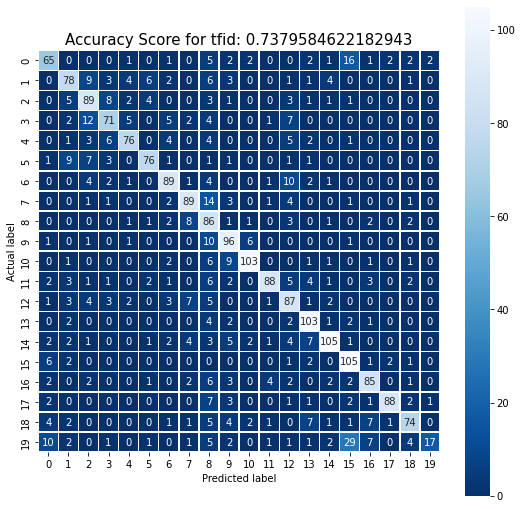

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(twentygroup_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for tfid: {0}'.format(twentygroup_score)
plt.title(all_sample_title, size = 15);
plt.savefig('20newsgroup.png')

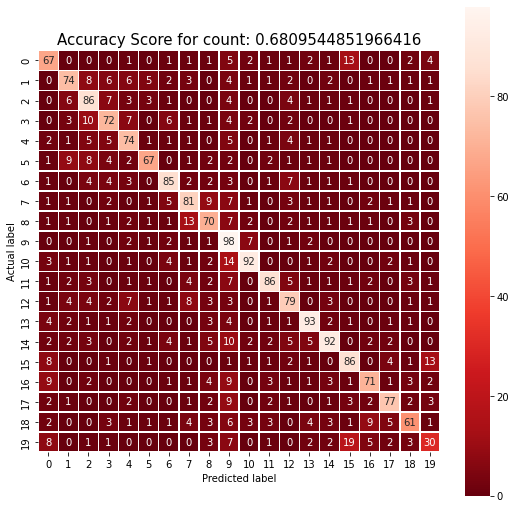

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(twentygroup_cm2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for count: {0}'.format(twentygroup_score2)
plt.title(all_sample_title, size = 15);
plt.savefig('20newsgroup2.png')

Text(0.5, 1.0, '140 sentiment confusion Matrix for tfid ')

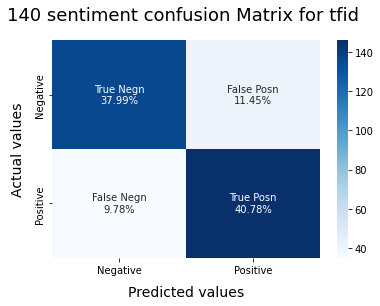

In [ ]:
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['\n{0:.2%}'.format(value) for value in sentiment_cm.flatten() / np.sum(sentiment_cm)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(sentiment_cm, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("140 sentiment confusion Matrix for tfid ", fontdict = {'size':18}, pad = 20)

Text(0.5, 1.0, '140 sentiment confusion Matrix for count')

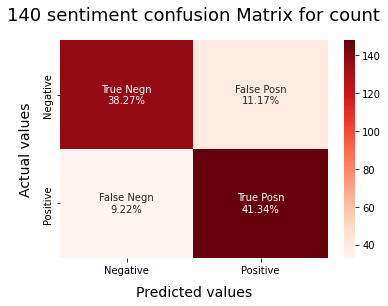

In [ ]:
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['\n{0:.2%}'.format(value) for value in sentiment_cm2.flatten() / np.sum(sentiment_cm2)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(sentiment_cm2, annot = labels, cmap = 'Reds',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("140 sentiment confusion Matrix for count", fontdict = {'size':18}, pad = 20)

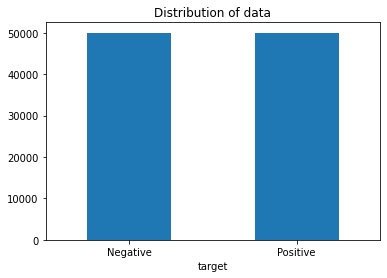

In [ ]:
# Plotting the distribution for dataset.
ax = sentiment_onefourty_train.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(sentiment_onefourty_train['text']), list(sentiment_onefourty_train['target'])

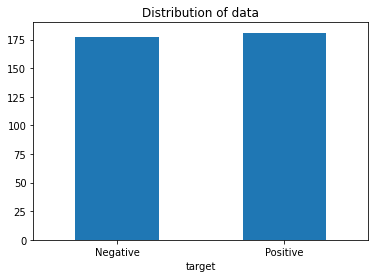

In [ ]:
# Plotting the distribution for dataset.
ax = sentiment_onefourty_test.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(sentiment_onefourty_test['text']), list(sentiment_onefourty_test['target'])

# HyperParameter estimation

In this section, we use random search for hyperparameter estimation. It finds the good result in relativly less run time comparing with grid search.

For Logsitic regression, fine tunning for three hyperparameters, a) C: inverse of regularization strength; b) max_iter: Maximum number of iterations taken for the solvers to converge; c ) L1 ration: The Elastic-Net mixing parameter, float [0,1].

TFID news group

In [ ]:
import numpy as np
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

#X, y = load_digits(return_X_y=True, n_class=3)
X = tfid_newsgroup_x_train 
y = tfid_newsgroup_y_train

# build a classifier
clf = LogisticRegression(C = 0.5,penalty='elasticnet',solver='saga',l1_ratio=0)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

def random_search():
  print("here")
  param_dist = {
     "C": stats.uniform(0, 1),
     "l1_ratio": stats.uniform(0, 1),
     #"max_iter": [100, 500, 1000, 1500],
    }

  # run randomized search
  n_iter_search = 15

  random_search = RandomizedSearchCV(
     clf, param_distributions=param_dist, n_iter=n_iter_search
  )

  start = time()
  random_search.fit(X, y)
  print(
     "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
     % ((time() - start), n_iter_search)
  )
  report(random_search.cv_results_)

random_search()

accuracy check

In [ ]:
#acc test for count data 20 news group
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C = 0.867,max_iter=1000)
logisticRegr.fit(tfid_newsgroup_x_train, tfid_newsgroup_y_train)
predictions = logisticRegr.predict(tfid_newsgroup_x_test)
score=logisticRegr.score(tfid_newsgroup_x_test, tfid_newsgroup_y_test)
print('Accuracy Score for count vectorization in 20newsgroup dataset step 1:', metrics.accuracy_score(tfid_newsgroup_y_test, predictions)) 
class_report=classification_report(tfid_newsgroup_y_test, predictions)
print(class_report)

In [ ]:
#acc test for count data 20 news group
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C = 0.867,max_iter=1000)
logisticRegr.fit(count_newsgroup_x_train, count_newsgroup_y_train)
predictions = logisticRegr.predict(count_newsgroup_x_test)
score=logisticRegr.score(count_newsgroup_x_test, count_newsgroup_y_test)
print('Accuracy Score for count vectorization in 20newsgroup dataset step 1:', metrics.accuracy_score(count_newsgroup_y_test, predictions)) 
class_report=classification_report(count_newsgroup_y_test, predictions)
print(class_report)

TFID sentiment

In [ ]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
#X, y = load_digits(return_X_y=True, n_class=3)
X = tfid_sentiment_x_train 
y = tfid_sentiment_y_train

# build a classifier
clf = LogisticRegression(C = 0.5,penalty='elasticnet',solver='saga',l1_ratio=0)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

def random_search():
  # specify parameters and distributions to sample from
  print("here")
  param_dist = {
     "C": stats.uniform(0, 1),
     "l1_ratio": stats.uniform(0, 1),
     #"max_iter": [100, 500, 1000, 1500],
    }

  # run randomized search
  n_iter_search = 15

  random_search = RandomizedSearchCV(
     clf, param_distributions=param_dist, n_iter=n_iter_search
  )

  start = time()
  random_search.fit(X, y)
  print(
     "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
     % ((time() - start), n_iter_search)
  )
  report(random_search.cv_results_)

random_search()

In [ ]:
#acc test for tfid sentiment
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C = 0.874,l1_ratio = 0.026)
logisticRegr.fit(tfid_sentiment_x_train, tfid_sentiment_y_train )
predictions = logisticRegr.predict(tfid_sentiment_x_test)
score=logisticRegr.score(tfid_sentiment_x_test, tfid_sentiment_y_test)
print('Accuracy Score for count vectorization in 20newsgroup dataset step 1:', metrics.accuracy_score(tfid_sentiment_y_test, predictions)) 
class_report=classification_report(tfid_sentiment_y_test, predictions)
print(class_report)

COUNT sentiment

In [ ]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
#X, y = load_digits(return_X_y=True, n_class=3)
X = count_sentiment_x_train 
y = count_sentiment_y_train

# build a classifier
# clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)
clf = LogisticRegression(C = 0.5,penalty='elasticnet',solver='saga',l1_ratio=0)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

def random_search():
  # specify parameters and distributions to sample from
  print("here")
  param_dist = {
     "C": stats.uniform(0, 1),
     "l1_ratio": stats.uniform(0, 1),
     #"max_iter": [100, 500, 1000, 1500],
    }

  # run randomized search
  n_iter_search = 8

  random_search = RandomizedSearchCV(
     clf, param_distributions=param_dist, n_iter=n_iter_search
  )

  start = time()
  random_search.fit(X, y)
  print(
     "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
     % ((time() - start), n_iter_search)
  )
  report(random_search.cv_results_)

random_search()

In [ ]:
#acc test for count sentiment
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C = 0.69,l1_ratio = 0.7)
logisticRegr.fit(count_sentiment_x_train, count_sentiment_y_train )
predictions = logisticRegr.predict(count_sentiment_x_test)
score=logisticRegr.score(count_sentiment_x_test, count_sentiment_y_test)
print('Accuracy Score for count vectorization in 20newsgroup dataset step 1:', metrics.accuracy_score(count_sentiment_y_test, predictions)) 
class_report=classification_report(count_sentiment_y_test, predictions)
print(class_report)

20% 40% 60% 80% training set tests for TFID 20 news group

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train_port = [100,80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = tfid_newsgroup_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  tfid_newsgroup_x_train_port = tfid_newsgroup_x_train[:splitIndex]
  tfid_newsgroup_y_train_port = tfid_newsgroup_y_train[:splitIndex]
  model = LogisticRegression()
  model.fit(tfid_newsgroup_x_train_port, tfid_newsgroup_y_train_port)
  #for this we're not returning probabilities, but an array of numbers y_pred representing the class predicted for each instance
  y_pred = model.predict(tfid_newsgroup_x_test)
  acc[i] = metrics.accuracy_score(tfid_newsgroup_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()

20% 40% 60% 80% training set tests for count 20 news group

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train_port = [100,80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = count_newsgroup_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  count_newsgroup_x_train_port = count_newsgroup_x_train[:splitIndex]
  count_newsgroup_y_train_port = count_newsgroup_y_train[:splitIndex]
  model = LogisticRegression(C = 0.867,max_iter=1000)
  model.fit(count_newsgroup_x_train_port, count_newsgroup_y_train_port)
  y_pred = model.predict(count_newsgroup_x_test)
  acc[i] = metrics.accuracy_score(count_newsgroup_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()

20% 40% 60% 80% training set tests for tfid sentiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train_port = [100,80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = tfid_sentiment_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  tfid_sentiment_x_train_port = tfid_sentiment_x_train[:splitIndex]
  tfid_sentiment_y_train_port = tfid_sentiment_y_train[:splitIndex]
  logisticRegr = LogisticRegression(C = 0.874,l1_ratio = 0.026)
  model.fit(tfid_sentiment_x_train_port, tfid_sentiment_y_train_port)
  y_pred = model.predict(tfid_sentiment_x_test)
  acc[i] = metrics.accuracy_score(tfid_sentiment_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()

20% 40% 60% 80% training set tests for count sentiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train_port = [100,80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = count_sentiment_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  count_sentiment_x_train_port = count_sentiment_x_train[:splitIndex]
  count_sentiment_y_train_port = count_sentiment_y_train[:splitIndex]
  logisticRegr = LogisticRegression(C = 0.69,l1_ratio = 0.7)
  model.fit(count_sentiment_x_train_port, count_sentiment_y_train_port)
  y_pred = model.predict(count_sentiment_x_test)
  acc[i] = metrics.accuracy_score(count_sentiment_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()